In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Benfords Law Check Function
def benfords_law_abakysis(df,colum_name):
  ## Extract the first digit from financial data
  first_digit=df[colum_name].astype(str).str[0].astype(int)
  ## Count the frequency of each digit
  actual_count=first_digit.value_counts().sort_index()
  ## Expected Benfords Law Distribution for First Digits
  expected_distribution=np.log10(1+1/np.arange(1,11)) #Change to 10 to only calculate for first digits 1-9

  print("Actual Distribution:")
  print(actual_count)
  print("\nExpected Distribution:")
  print(expected_distribution)

  ## Plot Actual vs expected Distribution
  plt.figure(figsize=(10,6))
  plt.bar(actual_count.index,actual_count/actual_count.sum(),label='Actual',color='blue',alpha=0.6)
  plt.plot(np.arange(1,11),expected_distribution,label='Expected (Benfords Law)',color='red',marker='o') #Change to 10 to only calculate for first digits 1-9
  plt.xlabel("First Digit")
  plt.ylabel("Proportion")
  plt.title(f"Benfords Law Analysis for {colum_name}")
  plt.legend()
  plt.show()

  actual_dist=actual_count/np.sum(actual_count)
  print(actual_dist)

  # Scale expected distribution to match the observed distribution sum
  # expected_freq = expected_distribution * np.sum(actual_count) #Added a calculation to scale the expected distribution to sum up the actual distribution

  chisq,p_value=chisquare(actual_dist, expected_distribution) #Removed actual_dist and changed to actual_count to compare to absolute frequency
  return chisq,p_value

In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
## Load the dataset
url='fraud.csv'
df=pd.read_csv(url)

Actual Distribution:
amount
0        132
1    2137518
2    1302139
3     798406
4     526686
5     395748
6     334283
7     305911
8     287550
9     274247
Name: count, dtype: int64

Expected Distribution:
[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749 0.04139269]


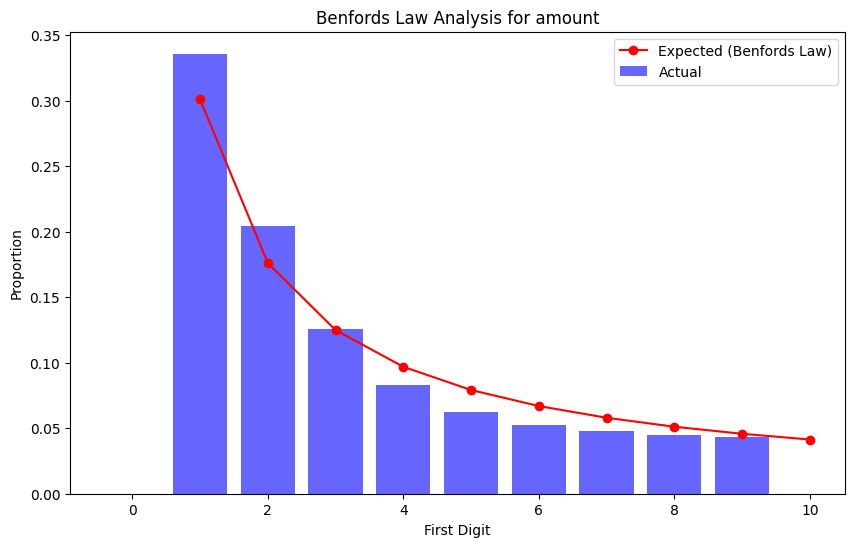

amount
0    0.000021
1    0.335949
2    0.204655
3    0.125484
4    0.082778
5    0.062199
6    0.052539
7    0.048079
8    0.045194
9    0.043103
Name: count, dtype: float64


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.04139268515822492

In [ ]:
benfords_law_abakysis(df,'amount')